In [ ]:
#!pip install pandas nltk
#!pip install tqdm

In [4]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
import string
import numpy as np


In [ ]:
'''input_file = "../data/toxic_comments_cleaned.csv"
output_file = "../data/processed.csv"
vocab_file = '../data/vocab.csv'''

In [ ]:
''''# Load the cleaned data from CSV
df = pd.read_csv(output_file)
# Load the vocabulary from CSV
vocab = pd.read_csv(vocab_file)
# Turn vocab into map
vocab = dict(zip(vocab['word'], vocab['id']))'''

Dataset should be downloaded from Here(https://www.kaggle.com/datasets/apoorvyadav/toxiccommentscleaned)

In [5]:
df = pd.read_csv('/kaggle/input/toxiccommentscleaned/toxic_comments_cleaned.csv')

<ipython-input-5-dd47b7a44355>:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/toxiccommentscleaned/toxic_comments_cleaned.csv')


In [6]:
df.head()

,id,comment_text,target
0,0000997932d777bf,explanation why the edits made under my userna...,0.0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0.0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0.0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0.0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11912547 entries, 0 to 11912546
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            object 
 1   comment_text  object 
 2   target        float64
dtypes: float64(1), object(2)
memory usage: 272.7+ MB


**Data Exploration- Removing rows with null values**


In [8]:
df.shape

(11912547, 3)

In [9]:
df.isnull().sum()

id                    0
comment_text    7866506
target          9884134
dtype: int64

In [1]:
df=df.dropna()
df.shape

NameError: name 'df' is not defined

In [11]:
df.isnull().sum()

id              0
comment_text    0
target          0
dtype: int64

In [12]:
(df[df["target"] == 1]["id"].count()) / df["id"].count()

0.08232098377921131

**Data Cleaning**

In [13]:
# Dictionary of English Contractions
import re
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['comment_text']=df['comment_text'].apply(lambda x:expand_contractions(x))

In [14]:
df['comment_text']=df['comment_text'].apply(lambda x: re.sub('\w*\d\w*','', x))


In [15]:

df['comment_text']=df['comment_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))


In [16]:
# Removing extra spaces
df['comment_text']=df['comment_text'].apply(lambda x: re.sub(' +',' ',x))

In [17]:
#turning all to lower case
df['comment_text']=df['comment_text'].apply(lambda x: x.lower())

In [18]:
for index,text in enumerate(df['comment_text'][35:40]):
  print('Review %d:\n'%(index+1),text)


Review 1:
  not at all you are making a straw man argument here i never claimed odonohue had that position rather that practitioners and researchers in the field ignored the dsm position which is exactly what the quote says and also something odonohue agrees with again i was combating the notion that it was a absurd part to claim that pedophilia is a sexual orientation since many researchers hold this position it would be unfair to call it absurd the disorder part is divided in the field some argue that it is not a disorder at all some do at the end of the day it is a value judgment as cantor pointed out earlier in the thread not a scientific judgement if we choose to make this value judgment in the article it should be stated clearly and not pretend to have a scientific basis 
Review 2:
  mainland asia includes the lower basin of chinas yangtze river as well as korea but being specific is fine too i just found a citation for a more comprehensive dna study by hammer below rather than o

In [19]:
#removing stop words
stop_words = set(stopwords.words('english'))
df['no_stop_words']=df['comment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [20]:
df.head()

,id,comment_text,target,no_stop_words
0,0000997932d777bf,explanation why the edits made under my userna...,0.0,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0.0,daww matches background colour im seemingly st...
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0.0,hey man im really trying edit war guy constant...
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0.0,cant make real suggestions improvement wondere...
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0.0,sir hero chance remember page thats


**Reducing Texts to their root form**

In [21]:
df['no_stop_words'] = df['no_stop_words'].astype(str)


In [22]:
stemmer = PorterStemmer()
# Stemming the words in the reviews

In [23]:
df['no_stop_words'].apply(lambda x: type(x)).value_counts()

no_stop_words
<class 'str'>    2026227
Name: count, dtype: int64

In [24]:

df.shape

(2026227, 4)

In [25]:

def clean_and_stem(text):
    try:
        if not isinstance(text, str):
            return ''
        words = text.split()
        clean_words = [w for w in words if len(w) < 50 and re.fullmatch(r'[a-zA-Z]+', w)]
        return ' '.join([stemmer.stem(word) for word in clean_words])
    except Exception as e:
        print(f"[ERROR] Problem with: {str(text)[:80]}... \nError: {e}")
        return ''


In [26]:
chunk_size = 100000
num_chunks = len(df) // chunk_size + (1 if len(df) % chunk_size else 0)


processed_chunks = []

for i in range(num_chunks):
    print(f"\n Processing chunk {i+1} of {num_chunks}...")
    
    chunk = df.iloc[i * chunk_size: (i + 1) * chunk_size].copy()
    chunk['stemmed'] = chunk['no_stop_words'].apply(clean_and_stem)
    
    # Option 1: store in list
    processed_chunks.append(chunk)
    




 Processing chunk 1 of 21...

 Processing chunk 2 of 21...

 Processing chunk 3 of 21...

 Processing chunk 4 of 21...

 Processing chunk 5 of 21...

 Processing chunk 6 of 21...

 Processing chunk 7 of 21...

 Processing chunk 8 of 21...

 Processing chunk 9 of 21...

 Processing chunk 10 of 21...

 Processing chunk 11 of 21...

 Processing chunk 12 of 21...

 Processing chunk 13 of 21...

 Processing chunk 14 of 21...

 Processing chunk 15 of 21...

 Processing chunk 16 of 21...

 Processing chunk 17 of 21...

 Processing chunk 18 of 21...

 Processing chunk 19 of 21...

 Processing chunk 20 of 21...

 Processing chunk 21 of 21...


In [27]:
df_processed = pd.concat(processed_chunks, ignore_index=True)


In [28]:
df_processed.head(10)

,id,comment_text,target,no_stop_words,stemmed
0,0000997932d777bf,explanation why the edits made under my userna...,0.0,explanation edits made username hardcore metal...,explan edit made usernam hardcor metallica fan...
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0.0,daww matches background colour im seemingly st...,daww match background colour im seemingli stuc...
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0.0,hey man im really trying edit war guy constant...,hey man im realli tri edit war guy constantli ...
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0.0,cant make real suggestions improvement wondere...,cant make real suggest improv wonder section s...
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0.0,sir hero chance remember page thats,sir hero chanc rememb page that
5,00025465d4725e87,congratulations from me as well use the tools...,0.0,congratulations well use tools well talk,congratul well use tool well talk
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1.0,cocksucker piss around work,cocksuck piss around work
7,00031b1e95af7921,your vandalism to the matt shirvington article...,0.0,vandalism matt shirvington article reverted pl...,vandal matt shirvington articl revert pleas do...
8,00037261f536c51d,sorry if the word nonsense was offensive to yo...,0.0,sorry word nonsense offensive anyway im intend...,sorri word nonsens offens anyway im intend wri...
9,00040093b2687caa,alignment on this subject and which are contra...,0.0,alignment subject contrary dulithgow,align subject contrari dulithgow


In [37]:
df_processed.to_csv('Fully_Processed_Data.csv')

**Creating a word cloud**

In [29]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [35]:
from wordcloud import WordCloud
# Take a sample of the first 100,000 rows (adjust based on your data size)
sample_text = ' '.join(df_processed['stemmed'].sample(200000, random_state=42))

# Generate the word cloud with max_words to limit the number of displayed words
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(sample_text)

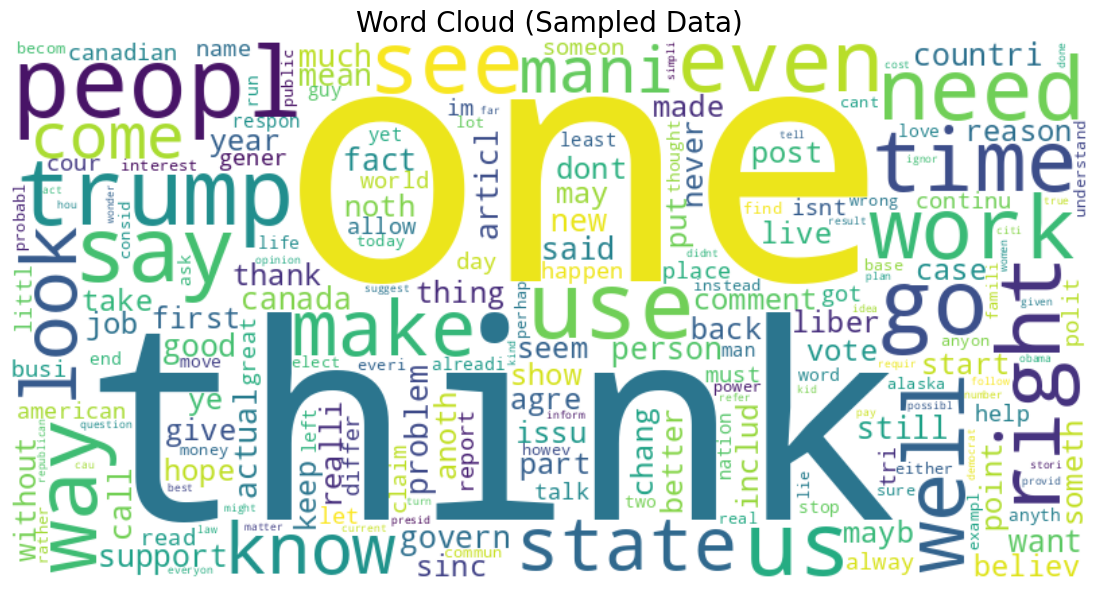

In [36]:
# Display the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Sampled Data)', fontsize=20)
plt.show()

**Creating a bag of words**

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_processed['stemmed'])


In [ ]:
df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print(df_bow)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['lemmatized']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Creating a word cloud**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['lemmatized']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
